In [20]:
!pip install kneed

In [21]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [22]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [23]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

make_blobs() is a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:


*   n_samples is the total number of samples to generate.
*   centers is the number of centers to generate.
*   cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:



*  A two-dimensional NumPy array with the x- and y-values for each of the samples
*   A one-dimensional NumPy array containing the cluster labels for each sample















In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

There are several approaches to implementing feature scaling

Take a look at how the values have been scaled in scaled_features:

In [25]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

Now the data are ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

Here are the parameters used in this example:

init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

n_clusters sets k for the clustering step. This is the most important parameter for k-means.

n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.

In [26]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run:

In [27]:
label = kmeans.fit_predict(scaled_features)

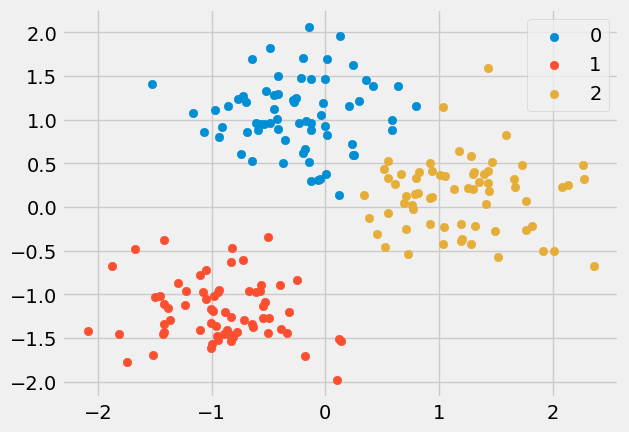

In [28]:
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(scaled_features[label == i , 0] , scaled_features[label == i , 1] , label = i)
plt.legend()
plt.show()

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [29]:
# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
kmeans.n_iter_

2

To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [30]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

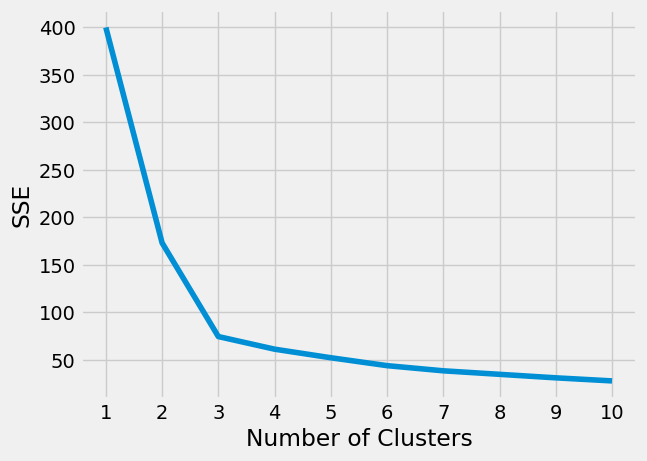

In [31]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

In [32]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3